In [1]:
import pandas as pd
import csv
import sqlite3

In [2]:
df = pd.read_csv('D:/za_stat.csv', sep=';', encoding='utf-8')


In [3]:
df.head()

,Verb,V_pst,za_V_pst,V_imp,za_V_imp
0,смеялcя,13 303,14 673,1 212,40
1,плакал,14 573,7 386,2 084,37
2,орал,3 408,3 917,461,4
3,интересовался,4 234,2 670,27,5
4,играл,28 361,2 439,1 080,39


In [4]:
df1 = pd.read_csv('D:/za_classes.csv', sep=';', encoding='utf-8')

In [5]:
df1.head()

,Verbs,act,lex
0,смеялcя,EPa,HumManner
1,плакал,EPa,HumManner
2,орал,Epa,SoundSpeech
3,интересовался,ESGen,HumRel
4,играл,Epa,OtherHumActivity


In [6]:
con = sqlite3.connect("prefix_za.db")
cur = con.cursor()
df.to_sql(name='za_statistics', con=con, if_exists='replace')


In [7]:
con = sqlite3.connect("prefix_za.db")
cur = con.cursor()
df1.to_sql(name='za_classes', con=con, if_exists='replace')

In [8]:
for row in cur.execute('SELECT * FROM za_statistics'):
    print(row)

(0, 'смеялcя', '13 303', '14 673', '1 212', 40)
(1, 'плакал', '14 573', '7 386', '2 084', 37)
(2, 'орал', '3 408', '3 917', '461', 4)
(3, 'интересовался', '4 234', '2 670', '27', 5)
(4, 'играл', '28 361', '2 439', '1 080', 39)
(5, 'интересовал', '4 626', '2 008', '0', 9)
(6, 'мёрз', '645', '1 996', '16', 13)
(7, 'стонал', '2 253', '1 719', '38', 2)
(8, 'ревел', '1 918', '1 477', '181', 6)
(9, 'звучал', '8 011', '1 465', '18', 2)
(10, 'шумел', '3 914', '1 459', '508', 5)
(11, 'блестел', '4 386', '1 148', '9', 2)
(12, 'визжал', '1 299', '1 093', '19', 2)
(13, 'качался', '1 800', '862', '23', 2)
(14, 'рычал', '816', '821', '68', 2)
(15, 'тряс', '1 899', '700', '67', 4)
(16, 'бастовал', '216', '445', '10', 2)
(17, 'упрямился', '186', '277', '60', 2)
(18, 'артачился', '33', '155', '4', 2)


In [9]:
con.commit()
con.close()

In [10]:
con1 = sqlite3.connect("prefix_za.db")
cur = con1.cursor()

In [11]:
#The first query
cur.execute('SELECT Verb FROM za_statistics ORDER BY za_V_imp')
print(cur.fetchall())
#Here I filter the verbs with respect to the frequency of their inchoatives in za- in imperative forms.

[('стонал',), ('звучал',), ('блестел',), ('визжал',), ('качался',), ('рычал',), ('бастовал',), ('упрямился',), ('артачился',), ('орал',), ('тряс',), ('интересовался',), ('шумел',), ('ревел',), ('интересовал',), ('мёрз',), ('плакал',), ('играл',), ('смеялcя',)]


In [12]:
#The second query.
cur.execute('SELECT * FROM za_statistics INNER JOIN za_classes ON za_statistics.Verb = za_classes.Verbs')
#Here I join the tables together. 

In [13]:
print(cur.fetchall())
con1.commit()


[(0, 'смеялcя', '13 303', '14 673', '1 212', 40, 0, 'смеялcя', 'EPa', 'HumManner'), (1, 'плакал', '14 573', '7 386', '2 084', 37, 1, 'плакал', 'EPa', 'HumManner'), (2, 'орал', '3 408', '3 917', '461', 4, 2, 'орал', 'Epa', 'SoundSpeech'), (3, 'интересовался', '4 234', '2 670', '27', 5, 3, 'интересовался', 'ESGen', 'HumRel'), (4, 'играл', '28 361', '2 439', '1 080', 39, 4, 'играл', 'Epa', 'OtherHumActivity'), (5, 'интересовал', '4 626', '2 008', '0', 9, 5, 'интересовал', 'ESGen', 'HumRel'), (6, 'мёрз', '645', '1 996', '16', 13, 6, 'мёрз', 'ES', 'HumPhys'), (7, 'стонал', '2 253', '1 719', '38', 2, 7, 'стонал', 'EPa', 'Sound'), (8, 'ревел', '1 918', '1 477', '181', 6, 8, 'ревел', 'EPa', 'Sound'), (9, 'звучал', '8 011', '1 465', '18', 2, 9, 'звучал', 'EPa', 'Sound'), (10, 'шумел', '3 914', '1 459', '508', 5, 10, 'шумел', 'EPa', 'Sound'), (11, 'блестел', '4 386', '1 148', '9', 2, 11, 'блестел', 'ES', 'Visual'), (12, 'визжал', '1 299', '1 093', '19', 2, 12, 'визжал', 'EMult', 'Sound'), (13, '

In [14]:
#The third query
cur.execute("SELECT Verb from za_statistics ORDER BY za_V_imp LIMIT 19 OFFSET 14")
print(cur.fetchall())
#Here I filter out the most frequent verbs with za- in imperative (the last one is the most frequent)

[('интересовал',), ('мёрз',), ('плакал',), ('играл',), ('смеялcя',)]


In [15]:
#Let it also be a part of the third query
cur.execute("SELECT Verb from za_statistics ORDER BY za_V_imp LIMIT 5")
print(cur.fetchall())
#Here I filter out the least frequent verbs with za- in imperative (the first one is the least frequent)

[('стонал',), ('звучал',), ('блестел',), ('визжал',), ('качался',)]


In [16]:
#The fourth query -- and next one is also a part of the fourth query
cur.execute('SELECT Verb FROM za_statistics INNER JOIN za_classes ON za_statistics.Verb = za_classes.Verbs WHERE lex = "Sound" OR lex = "SoundSpeech" ORDER BY za_V_imp')
print(cur.fetchall())
#Here I filter out most frequent verbs of sound occured with za- in the imperative (the last one is the most frequent)

[('стонал',), ('звучал',), ('визжал',), ('рычал',), ('орал',), ('шумел',), ('ревел',)]


In [17]:
cur.execute('SELECT Verb FROM za_statistics INNER JOIN za_classes ON za_statistics.Verb = za_classes.Verbs WHERE lex = "Sound" OR lex = "SoundSpeech" ORDER BY V_imp')
print(cur.fetchall())
#Here I do the same for the imperative forms of the base predicates.Note that the is a difference: 
#реветь is the most frequent verb in za-imperatives, while it is practically the last verb in simple imperatives.
#I think this is explainable via the fact that if we talk about the beginning of an action, more agentive verbs should be more frequent. Here it works the same. 
#In usual imperative contexts, the situation could be different since we can say imperatives to cause to stop the action (like "Не рычи на меня!")

[('звучал',), ('ревел',), ('визжал',), ('стонал',), ('орал',), ('шумел',), ('рычал',)]


In [18]:
#The fifth query
cur.execute("SELECT Verb, (V_pst + V_imp + za_V_pst + za_V_imp) AS V_freq FROM za_statistics ORDER BY V_freq")
print(cur.fetchall())
#Here I filter verbs with respect to their whole frequency (including inchoatives)

[('интересовал', 15), ('блестел', 16), ('визжал', 23), ('звучал', 29), ('интересовался', 38), ('стонал', 43), ('плакал', 60), ('смеялcя', 68), ('играл', 70), ('ревел', 189), ('артачился', 194), ('орал', 471), ('шумел', 517), ('упрямился', 525), ('бастовал', 673), ('мёрз', 675), ('тряс', 772), ('качался', 888), ('рычал', 1707)]


In [19]:
#The last, six query
cur.execute("SELECT AVG(za_V_pst) FROM za_statistics")
print(cur.fetchall())
#Here I find an average of the usages of za- in the past. It is strange, because in EXcel, there is another number.

[(173.52631578947367,)]


In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
df2 = pd.read_csv('E:/pref_za_disaggregategy.csv', sep=';', encoding='utf-8')
df2.head()

,v,v_imp,v_za,act,lex
0,смеялся,0,0,EPa,HumManner
1,смеялся,0,0,EPa,HumManner
2,смеялся,0,0,EPa,HumManner
3,смеялся,0,0,EPa,HumManner
4,смеялся,0,0,EPa,HumManner


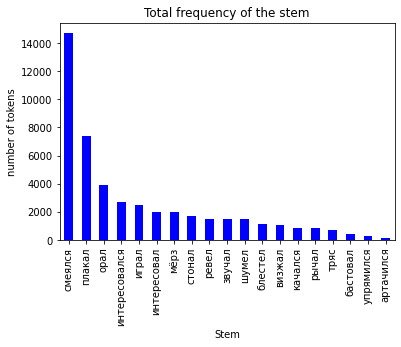

In [52]:
df2[df2['v_za'] == 1]['v'].value_counts().plot.bar(color='blue'); 
plt.title('Total frequency of the stem')
plt.xlabel('Stem')
plt.ylabel('number of tokens');
#This graph shows us how much usages with za- each stem has

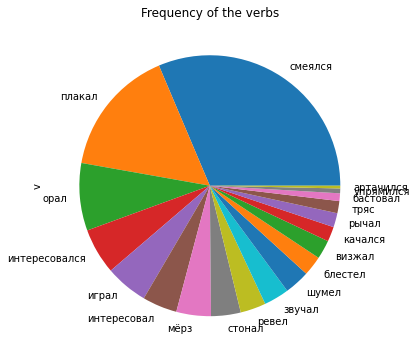

In [51]:
plt.figure(figsize=(6, 6))
df2[df2['v_za'] == 1]['v'].value_counts().plot(kind='pie');
plt.title('Frequency of the verbs');
#This graph shows the "portion" of usages of inchoative from a verb among all of the usages of the inchoatives in za-

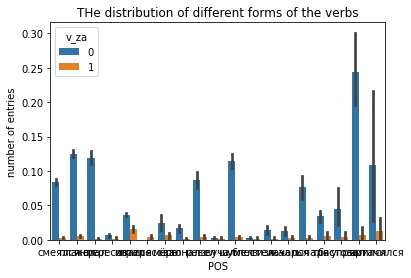

In [65]:
sns.barplot(x="v", y="v_imp", hue = "v_za", orientation=u'vertical', data=df2)
plt.title('THe distribution of different forms of the verbs')
plt.xlabel('POS')
plt.ylabel('number of entries');
#This graph shows the proportion of forms with za- and without za- for each verb.
#As far as I understood, blue lines in the colums are responsible for imperative parts.

ValueError: Could not interpret input 'POS'